# Unzip the files

In [1]:
!unzip /kaggle/input/dogs-vs-cats/train.zip
!unzip /kaggle/input/dogs-vs-cats/test1.zip

Archive:  /kaggle/input/dogs-vs-cats/train.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/cat.10015.jpg     
  inflating: train/cat.10016.jpg     
  inflating: train/cat.10017.jpg     
  inflating: train/ca

# load and preprocess the dataset

In [2]:
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from skimage.feature import hog
import matplotlib.pyplot as plt

# Path to your dataset folder
data_folder = '/kaggle/working/train'
test_folder = '/kaggle/working/test1'

# Preprocess images
def preprocess_image(image_path, size=(64, 64)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    return image

# Extract HOG features
def extract_hog_features(image):
    features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True, channel_axis=None)
    return features

# Load dataset and extract features
def load_dataset(data_folder):
    labels = []
    features = []
    for filename in os.listdir(data_folder):
        if 'cat' in filename:
            label = 0
        elif 'dog' in filename:
            label = 1
        else:
            continue

        image_path = os.path.join(data_folder, filename)
        image = preprocess_image(image_path)

        # Debugging statement to check image shape
        print(f"Processing {filename}, Image shape: {image.shape}")

        hog_features = extract_hog_features(image)

        features.append(hog_features)
        labels.append(label)

    return np.array(features), np.array(labels)

# Load dataset
X, y = load_dataset(data_folder)

Processing dog.3815.jpg, Image shape: (64, 64)
Processing dog.3194.jpg, Image shape: (64, 64)
Processing dog.10633.jpg, Image shape: (64, 64)
Processing dog.5116.jpg, Image shape: (64, 64)
Processing dog.118.jpg, Image shape: (64, 64)
Processing cat.2940.jpg, Image shape: (64, 64)
Processing dog.7774.jpg, Image shape: (64, 64)
Processing cat.4738.jpg, Image shape: (64, 64)
Processing dog.6340.jpg, Image shape: (64, 64)
Processing cat.6187.jpg, Image shape: (64, 64)
Processing dog.3082.jpg, Image shape: (64, 64)
Processing cat.1861.jpg, Image shape: (64, 64)
Processing cat.3158.jpg, Image shape: (64, 64)
Processing dog.4784.jpg, Image shape: (64, 64)
Processing cat.10373.jpg, Image shape: (64, 64)
Processing cat.4225.jpg, Image shape: (64, 64)
Processing dog.3995.jpg, Image shape: (64, 64)
Processing cat.1601.jpg, Image shape: (64, 64)
Processing dog.10047.jpg, Image shape: (64, 64)
Processing dog.604.jpg, Image shape: (64, 64)
Processing dog.5279.jpg, Image shape: (64, 64)
Processing c

# Run the svm classifier

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 3.8min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 3.6min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 3.7min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 5.4min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 5.4min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 5.4min
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time= 3.7min
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time= 3.7min
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time= 3.7min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 5.5min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 5.3min
[CV] END ......................C=0.1, gamma=0.01

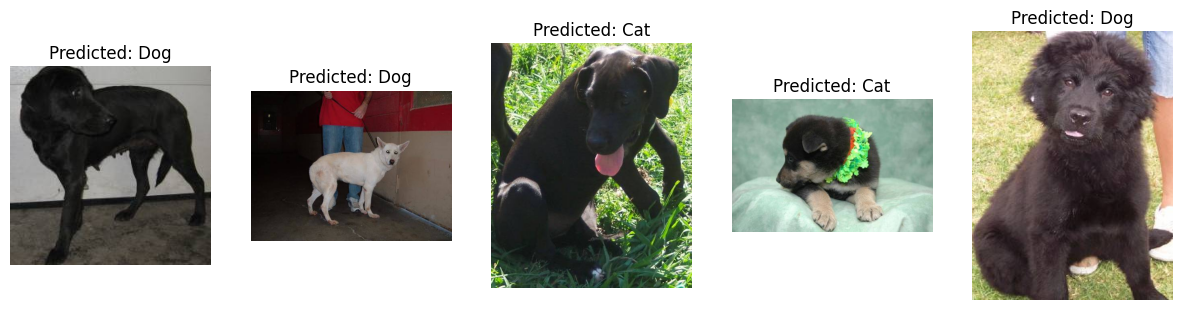

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from skimage.feature import hog
import matplotlib.pyplot as plt
import zipfile

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVM model
svm_classifier = svm.SVC()

# Define the hyperparameters and their values for grid search
param_grid = {
    'C': [0.1, 1 ],
    'gamma': [ 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, refit=True, verbose=2, cv=3)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f'Best Hyperparameters: {grid_search.best_params_}')

# Make predictions using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot some results
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    image_path = os.path.join(data_folder, os.listdir(data_folder)[i])
    image = cv2.imread(image_path)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title(f'Predicted: {"Dog" if y_pred[i] else "Cat"}')
    ax.axis('off')
plt.show()

# Test folder predicition in csv file

In [ ]:
# Predict on test1 images and save results in CSV
def predict_test_images(test_folder, model, size=(64, 64)):
    results = []
    for filename in os.listdir(test_folder):
        image_id = os.path.splitext(filename)[0]
        image_path = os.path.join(test_folder, filename)
        image = preprocess_image(image_path)
        hog_features = extract_hog_features(image)
        hog_features = hog_features.reshape(1, -1)

        prediction = model.predict(hog_features)[0]
        label = 'dog' if prediction == 1 else 'cat'

        results.append([image_id, label])

    return results

# Make predictions on test1 folder
test_results = predict_test_images(test_folder, grid_search.best_estimator_)

# Save predictions to a CSV file
results_df = pd.DataFrame(test_results, columns=['id', 'label'])
results_df.to_csv('submissionwithgrid.csv', index=False)

print("Predictions saved to submissionwithgrid.csv")